In [28]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import re
import nltk
import glob
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import stopwords
nltk.download('wordnet')
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
# merging the files
joined_files = os.path.join(r"\Users\USER\OneDrive - Solent University\School Work\COM 726\AE1\Dataset\Monzo", "exported_mz*.csv")

# A list of all joined files is returned
joined_list = glob.glob(joined_files)

# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,15cae506-4176-4364-b94d-d0053cc1345a,Martin,https://play-lh.googleusercontent.com/a/ALm5wu...,Sucks. Impossible to reset pin.,1,1,4.52.0,2022-11-30 14:34:38,Hey Martin 👋 Sorry to hear you're having troub...,2022-11-30 15:03:24
1,99996806-f16b-4085-bfce-8cf5f910e9bb,Kev Minds,https://play-lh.googleusercontent.com/a/ALm5wu...,Monzo app is always spot on and uploads really...,5,0,5.2.0,2022-11-30 13:00:20,NaN,NaN
2,bfa1d602-a3e8-441e-a222-9b5304912ad2,Samuel David,https://play-lh.googleusercontent.com/a-/ACNPE...,Unable to fil in my id for days after several ...,2,0,5.2.0,2022-11-30 10:52:40,"Hey Samuel 👋 We're so sorry to hear that, how ...",2022-11-30 10:54:32
3,6a0e0d02-4a4e-438f-896d-353343f6612e,Michael “Mitch” McBain,https://play-lh.googleusercontent.com/a-/ACNPE...,glitch-free,5,0,5.1.0,2022-11-29 23:47:01,NaN,NaN
4,09f8fb25-0640-49ad-b854-57f32fef06f4,Glenn Lewis,https://play-lh.googleusercontent.com/a-/ACNPE...,"Have to speak as I find, I have been using Mon...",5,0,4.45.1,2022-11-29 22:45:22,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
342938,47640aee-6c66-4564-8841-2b59e1ef911c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's a waiting list. Wow! Absolutely pointless...,1,1,0.1.2,2016-05-25 11:45:04,NaN,NaN
342939,1d0e1714-7ec4-4e0f-aa68-34f4fa720fa7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Pretty disappointed to go from an email saying...,2,3,0.1.2,2016-05-25 11:34:15,NaN,NaN
342940,6fb7a8d3-4ee4-4025-a69c-05a0d36a4e8b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,On the waiting list. Looking forward to all th...,5,8,0.1.2,2016-05-25 11:31:56,NaN,NaN
342941,e347d6bf-e867-489d-a9a6-f20a142e9368,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Mondo for Android - can't wait. The iOS app i...,5,4,1.0,2016-05-13 15:05:25,NaN,NaN


In [7]:
#printing shape of the entire dataframe
df.shape

(342943, 10)

In [11]:
#Creating a new column called sentiment by using the review rating score

def sentiment(n):return 1 if n >= 3 else 0
df['sentiment'] = df['score'].apply(sentiment)

In [12]:
#Viewing the  data frame columns of ony content and sentiment
df_1 = df[['content','sentiment']]
df_1.tail(10)

,content,sentiment
342933,I was on iOS and had mondo - now on android an...,1
342934,All good knowing something is happening all my...,1
342935,No idea why as an investor we are being made t...,0
342936,"Great to see something is being done, nice ide...",1
342937,Brilliant way to minimise losses by gaging int...,1
342938,It's a waiting list. Wow! Absolutely pointless...,0
342939,Pretty disappointed to go from an email saying...,0
342940,On the waiting list. Looking forward to all th...,1
342941,Mondo for Android - can't wait. The iOS app i...,1
342942,It is just the waiting list for now but it is ...,1


In [13]:
#Check if there are any null values
#data_1 = data[['verified_reviews','sentiment']]
df_1.isnull().sum()

#There are 23 null values in the content column

content      23
sentiment     0
dtype: int64

In [15]:
# Getting the shape of teh dataframe after adding a new column called sentiment
 df_1.shape

(342943, 2)

In [16]:
# Drop duplicates
df_1.drop_duplicates("content", inplace=True)

In [17]:
#Getting the shape of the data set after removing duplicates
df_1.shape

(12885, 2)

In [18]:
#dropping empty  rows in the content column
df_1.dropna(inplace=True)

In [19]:
#Getting the shape of the data set after removing null values
df_1.shape

(12884, 2)

In [22]:
#Tokenizing, removinfg stop sords, lemmatizing
def preprocess_df(df):
    # Create a new column to store the processed text
    df['processed_text'] = ''

    # Create a tokenizer and stemmer
    tokenizer = PunktSentenceTokenizer()
    stemmer = PorterStemmer()
    lemmatizer = nltk.WordNetLemmatizer()

    # Get a list of English stop words
    stop_words = set(stopwords.words('english'))

    # Iterate over the rows of the DataFrame
    for index, row in df.iterrows():
        # Tokenize the text
        tokens = tokenizer.tokenize(row['content'])

        # Lowercase the text
        tokens = [token.lower() for token in tokens]

        # Remove punctuation
        tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]

        # Remove stop words
        tokens = [token for token in tokens if token not in stop_words]

        # Stem the tokens
        tokens = [stemmer.stem(token) for token in tokens]

        # Lemmatize the tokens
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Join the tokens back into a single string
        processed_text = ' '.join(tokens)

        # Update the 'processed_text' column for the current row
        df.at[index, 'processed_text'] = processed_text

    return df

df_clean = preprocess_df(df_1)
df_clean

,content,sentiment,processed_text
0,Sucks. Impossible to reset pin.,0,suck impossible to reset pin
1,Monzo app is always spot on and uploads really...,1,monzo app is always spot on and uploads really...
2,Unable to fil in my id for days after several ...,0,unable to fil in my id for days after several ...
3,glitch-free,1,glitchfre
4,"Have to speak as I find, I have been using Mon...",1,have to speak as i find i have been using monz...
...,...,...,...
255203,Was really good ... the app is Spotless as wel...,1,was really good the app is spotless as well ...
255326,"Great app for budgeting, crate pots, lots of p...",1,great app for budgeting crate pots lots of pot...
263417,Monzo is great BUT I find it impossible to lau...,1,monzo is great but i find it impossible to lau...
265122,"Great experience so far, can't fault it. Looki...",1,great experience so far cant fault it looking ...


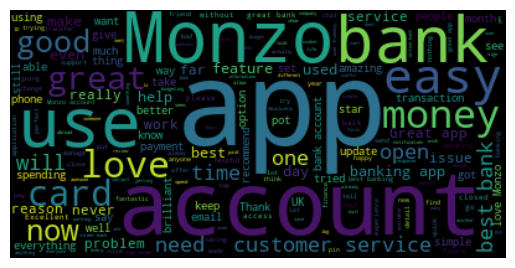

In [25]:
#Gettig the common words
common_words=''
for i in df_1.content:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Encoded the target column
lb=LabelEncoder()
df_1['sentiment'] = lb.fit_transform(df_1['sentiment'])

In [29]:
#Tokenizing and converting the reviews into numerical vectors.
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(df_1['content'].values)
X = tokenizer.texts_to_sequences(df_1['content'].values)
X = pad_sequences(X)

In [30]:
#Compiling the model
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 437, 120)          60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 437, 120)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
#Splitting the data into training and testing
y=pd.get_dummies(df_1['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
#Training the model using training data
batch_size=32
model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
282/282 [==============================] - 768s 3s/step - loss: 0.3512 - accuracy: 0.8464
Epoch 2/5
282/282 [==============================] - 680s 2s/step - loss: 0.2373 - accuracy: 0.9057
Epoch 3/5
282/282 [==============================] - 685s 2s/step - loss: 0.2125 - accuracy: 0.9164
Epoch 4/5
282/282 [==============================] - 678s 2s/step - loss: 0.1970 - accuracy: 0.9217
Epoch 5/5
282/282 [==============================] - 1567s 6s/step - loss: 0.1849 - accuracy: 0.9278


In [33]:
#Evaluating the model
model.evaluate(X_test,y_test)

121/121 [==============================] - 38s 295ms/step - loss: 0.2295 - accuracy: 0.9136


[0.22946196794509888, 0.913605809211731]